#### Owner : Alexei Alves de Souza - Matrícula : 398611

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import unidecode #pip install Unidecode

#### Esse trabalho tem como objetivo trazer uma análise do "META"  do TCG Hearthstone, trazendo análises dos decks mais utilizados, porcentagens de vitórias para assim estabelecer um "META" de arquétipos de decks mais viavéis naquele momento.

### Montando os Datasets:
#### Os datasets foram obtidos a partir da página https://hsreplay.net/meta/?hl=pt-br#tab=matchups no formato do arquivo txt data.log, as funções abaixo irão tratar o arquivo para construir as respectivas tabelas.
#### Para extrair o arquivo basta copiar e colar e após isso selecionar a área que engloba os dados da partida.
#### Os seguintes procedimentos foram utilizados para remontar a tabela visível no site:

In [2]:
#Função para limpar os dados e obter os nomes dos arquetipos
def get_archetypes(patch):
    data = open(patch,'r',encoding = 'utf8')
    nome_linhas = []
    nome_colunas = []
    index = []
    
    control_flag = 0
    control_count = 0
    
    newMatchup = 0
    newArchetype = ''
    
    for line in data:
        if 'Contra:' in line :
            if control_flag == 0:
                oponent = line[7:].lstrip()
                nome_colunas.append(oponent.rstrip())
                index.append(1)
            else:
                if index[control_count] == 0:
                    oponent = line[7:].lstrip()
                    nome_colunas[control_count] = oponent.rstrip()
                    index[control_count] = 1
            
            
            
        if 'Número de partidas insuficiente' in line or 'Partida espelhada' in line:
            if control_flag == 0:
                nome_colunas.append('missing')
                index.append(0)
        
        
            
        if newMatchup == 1:
            control_count+= 1
            newMatchup = 0
            archetype = line
            
            if archetype != newArchetype and archetype != 'Número de partidas insuficiente\n' :
                if newArchetype != '' and control_flag == 0:
                    control_flag = 1
                
                control_count = 0
                newArchetype = archetype
                nome_linhas.append(newArchetype.rstrip())
                
             
            
        elif line[0] == '~' or line[0].isnumeric() == True:
            newMatchup = 1
    
    return nome_colunas,nome_linhas


In [3]:
#Função para obter os valores númericos
def get_values(patch,mode):
    
    if mode == 0:
        str_values = 'Taxa de vitória:'
        str_end = 16
    else :
        str_values = 'Partidas:'
        str_end = 9
    data = open(patch,'r',encoding = 'utf8')
    values = np.empty(0)
    for line in data :
        if 'Partida espelhada' in line :
            values = np.append(values,'mirror')
        elif str_values in line :
            num = line[str_end:].lstrip().rstrip()
            num = [x for x in num if x.isnumeric()]
            if mode == 0:
                num.insert(2,'.')
            num = ''.join(num)
            values = np.append(values,num)
        elif 'Número de partidas insuficiente' in line :
            values = np.append(values,'noMatches')
    return values,len(values)

In [4]:
# 0 -> taxa de vitoria, 1 -> Número de partidas
#
patch = './data.log'
nome_colunas,nome_linhas = get_archetypes(patch)
lines,cols = len(nome_linhas),len(nome_colunas)

matriz1 = get_values(patch,1)[0].reshape((lines,cols))
matriz0 = get_values(patch,0)[0].reshape((lines,cols))

df1 = pd.DataFrame(matriz1,index = nome_linhas, columns= nome_colunas)
df0 = pd.DataFrame(matriz0,index = nome_linhas, columns= nome_colunas)

In [5]:
#Convert o dataframe em float64 : NaN representa as Mirror Matches
df1 = df1.apply(pd.to_numeric,args = ('coerce',))
df0 = df0.apply(pd.to_numeric,args = ('coerce',))

In [6]:
#Dataset do número de partidas
df1.head(10)

,Paladino Murloc,Highlander Hunter,Totem Shaman,Pure Paladin,Caçador Dragão,Mago Highlander,Tempo Demon Hunter,Face Hunter,Galakrond Secret Rogue,Galakrond Shaman,...,Enrage Warrior,Druida Missão,Galakrond Warrior,Outro Mago,Outro Xamã,Highlander Warrior,Outro Ladino,Quest Rogue,Outro Caçador de Demônios,Small Spell Mage
Paladino Murloc,NaN,6529.0,2074.0,3269.0,3850.0,5030.0,5249.0,3254.0,3135.0,2547.0,...,585.0,592.0,362.0,1326.0,1104.0,122.0,721.0,689.0,476.0,1041.0
Highlander Hunter,6529.0,NaN,2829.0,4045.0,5331.0,6923.0,6803.0,4079.0,3987.0,3394.0,...,806.0,731.0,462.0,1288.0,1082.0,112.0,814.0,717.0,450.0,1003.0
Totem Shaman,2074.0,2829.0,NaN,1441.0,1739.0,2191.0,2291.0,1498.0,1387.0,1124.0,...,280.0,270.0,219.0,665.0,541.0,48.0,364.0,303.0,274.0,477.0
Pure Paladin,3269.0,4045.0,1441.0,NaN,2755.0,3317.0,3645.0,2278.0,1982.0,1756.0,...,459.0,361.0,270.0,1031.0,819.0,76.0,546.0,437.0,421.0,622.0
Caçador Dragão,3850.0,5331.0,1739.0,2755.0,NaN,4081.0,4363.0,2736.0,2625.0,2153.0,...,492.0,493.0,332.0,1068.0,855.0,102.0,591.0,570.0,450.0,839.0
Mago Highlander,5030.0,6923.0,2191.0,3317.0,4081.0,NaN,5410.0,3333.0,3165.0,2782.0,...,641.0,527.0,335.0,1667.0,1214.0,80.0,798.0,545.0,638.0,777.0
Tempo Demon Hunter,5249.0,6803.0,2291.0,3645.0,4363.0,5410.0,NaN,3885.0,3299.0,2776.0,...,702.0,665.0,443.0,1469.0,1190.0,138.0,839.0,739.0,697.0,1247.0
Face Hunter,3254.0,4079.0,1498.0,2278.0,2736.0,3333.0,3885.0,NaN,2153.0,1854.0,...,440.0,423.0,302.0,1027.0,748.0,78.0,588.0,541.0,396.0,890.0
Galakrond Secret Rogue,3135.0,3987.0,1387.0,1982.0,2625.0,3165.0,3299.0,2153.0,NaN,1615.0,...,402.0,347.0,227.0,934.0,704.0,52.0,473.0,382.0,342.0,487.0
Galakrond Shaman,2547.0,3394.0,1124.0,1756.0,2153.0,2782.0,2776.0,1854.0,1615.0,NaN,...,350.0,311.0,224.0,852.0,646.0,60.0,390.0,329.0,363.0,499.0


In [7]:
#Dataset da winrate 
df0.head(10)

,Paladino Murloc,Highlander Hunter,Totem Shaman,Pure Paladin,Caçador Dragão,Mago Highlander,Tempo Demon Hunter,Face Hunter,Galakrond Secret Rogue,Galakrond Shaman,...,Enrage Warrior,Druida Missão,Galakrond Warrior,Outro Mago,Outro Xamã,Highlander Warrior,Outro Ladino,Quest Rogue,Outro Caçador de Demônios,Small Spell Mage
Paladino Murloc,NaN,59.85,66.20,56.31,65.94,44.37,49.11,64.59,55.75,64.27,...,51.96,83.10,58.28,70.88,70.83,58.19,69.90,67.92,64.28,76.17
Highlander Hunter,40.12,NaN,53.65,48.65,50.55,65.79,49.58,49.27,55.75,59.81,...,61.91,70.04,76.40,76.78,68.57,73.21,69.41,71.40,70.00,78.06
Totem Shaman,33.79,46.34,NaN,48.02,54.74,49.93,37.58,62.14,47.80,55.78,...,42.50,79.25,53.42,62.55,63.40,50.00,57.41,65.67,46.35,75.05
Pure Paladin,43.68,51.32,51.97,NaN,62.50,40.82,56.04,73.13,41.62,51.53,...,67.75,61.77,69.62,58.00,63.85,81.57,60.25,60.86,67.22,62.54
Caçador Dragão,34.05,49.44,45.25,37.49,NaN,60.40,51.57,50.65,52.53,53.55,...,55.48,63.89,63.55,73.03,61.63,69.60,66.32,68.07,60.00,78.30
Mago Highlander,55.62,34.19,50.06,59.17,39.54,NaN,53.34,34.59,53.71,54.45,...,59.28,59.20,58.20,64.48,67.46,70.00,67.66,67.52,70.06,60.23
Tempo Demon Hunter,50.88,50.41,62.41,43.95,48.42,46.65,NaN,50.01,50.77,53.02,...,48.00,60.60,60.72,66.16,72.10,60.14,65.55,68.20,64.70,69.36
Face Hunter,35.40,50.67,37.85,26.86,49.30,65.37,49.93,NaN,60.28,55.82,...,49.31,47.51,52.98,70.59,60.29,51.28,64.28,70.79,61.36,77.52
Galakrond Secret Rogue,44.24,44.24,52.19,58.37,47.39,46.28,49.22,39.71,NaN,50.21,...,57.21,51.87,61.23,60.92,66.90,65.38,63.21,62.30,59.35,61.80
Galakrond Shaman,35.72,40.18,44.21,48.46,46.44,45.54,46.97,44.17,49.78,NaN,...,60.57,66.23,68.30,60.79,62.22,58.33,63.84,69.90,58.12,67.13


### Análise:
-> Aqui serão realizadas uma série de análises com o objetivo de filtrar os melhores decks! 

#### Arquétipos mais jogados:
##### Os 10 arquétipos com maior número de partidas contabilizadas.

In [8]:
#Soma os valores das partidas jogadas totais.
sum_df1 = df1.sum().sort_values(ascending=False)

#Seleciona os 10 arquétipos mais jogados
sum_df1_head = sum_df1.head(10)
sum_df1_head

Galakrond Priest      142636.0
Highlander Hunter     105270.0
Tempo Demon Hunter     95045.0
No Minion Mage         91951.0
Mago Highlander        86030.0
Paladino Murloc        84733.0
Caçador Dragão         71894.0
Face Hunter            62864.0
Dragon Druid           62666.0
Pure Paladin           58487.0
dtype: float64

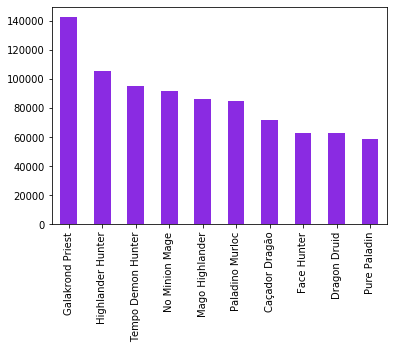

In [9]:
sum_df1_head.plot(kind = 'bar',color = 'blueviolet')

#### Classes mais jogadas

In [10]:
#Filtra os arquétipos pertecentes a cada classe agrupando utilizando tanto a linguagem inglesa como portuguesa.
classesEN = np.array(['Demon Hunter', 'Druid', 'Hunter', 'Mage', 'Paladin', 'Priest', 'Rogue', 'Shaman', 'Warlock', 'Warrior' ])
classesBR = np.array(['Caçador de Demônios', 'Druida', 'Caçador', 'Mago', 'Paladino', 'Sacerdote', 'Ladino', 'Xamã', 'Bruxo',
             'Guerreiro' ])
classesDici = dict.fromkeys(classesEN,0)
for key in sum_df1.keys() :
    
    if any(x in key for x in classesEN) or any(y in key for y in classesBR):
        classe = next((x for x in np.concatenate((classesEN,classesBR)) if x in key),False) 
        if classe in classesEN:
            pass
        else:
            classIdx = np.where(classesBR == classe)[0][0]
            classe = classesEN[classIdx]
        valueIdx = np.where(np.array(sum_df1.keys()) == key)[0][0]
        classesDici[classe] += sum_df1.values[valueIdx]


In [11]:
classesDici = {k: v for k, v in sorted(classesDici.items(), key=lambda item: item[1],reverse = True)}
classesDici

{'Mage': 283599.0,
 'Priest': 268524.0,
 'Hunter': 252003.0,
 'Druid': 163293.0,
 'Rogue': 159854.0,
 'Paladin': 159639.0,
 'Demon Hunter': 159603.0,
 'Shaman': 146764.0,
 'Warlock': 95703.0,
 'Warrior': 85199.0}

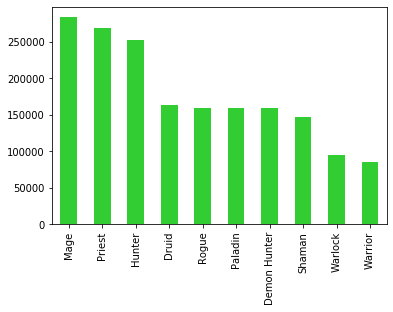

In [12]:
most_played_classes = pd.Series(classesDici)
most_played_classes.plot(kind = 'bar',color = 'limegreen')

#### Os 10 decks com maior winrate total:

In [13]:
#Obtém os decks com a maior winrate geral com os pesos sendo o número de partidas jogadas contra cada arquétipo
wr_total = ((df0*df1).transpose().sum()/df1.transpose().sum()).sort_values(ascending = False).head(10)
wr_total

Paladino Murloc           60.249143
Highlander Hunter         59.865312
Totem Shaman              55.911839
Caçador Dragão            54.380436
Pure Paladin              54.096946
Mago Highlander           53.367319
Tempo Demon Hunter        53.058028
Galakrond Secret Rogue    52.052494
Face Hunter               51.972872
Galakrond Shaman          51.616706
dtype: float64

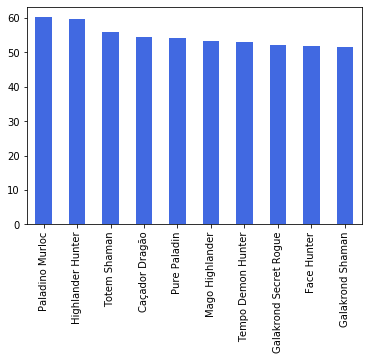

In [14]:
wr_total.plot(kind = 'bar',color = 'royalblue')

#### Os 10 decks com maior winrate em relação aos arquétipos mais jogados:

In [15]:
#Obtém os decks com maior winrate apenas contra os decks mais presentes do meta
most_played_arq = np.array(sum_df1_head.keys())
wrdf = df0[most_played_arq].transpose()[most_played_arq]

In [16]:
sum_arch = df1[wrdf.keys()].transpose()[wrdf.keys()]

wr_arch = ((wrdf*sum_arch).sum()/sum_arch.sum()).sort_values(ascending = False)
wr_arch

Paladino Murloc       59.229580
Highlander Hunter     57.238925
Pure Paladin          53.343771
Caçador Dragão        52.345361
Tempo Demon Hunter    49.994084
Face Hunter           48.843685
Mago Highlander       48.462841
Dragon Druid          45.910509
No Minion Mage        44.212091
Galakrond Priest      42.956822
dtype: float64

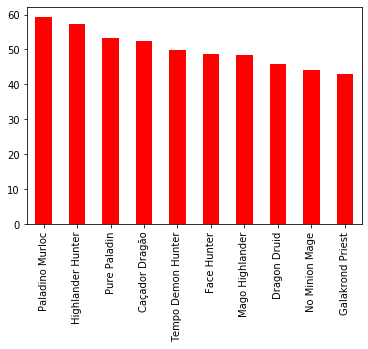

In [17]:
wr_arch.plot(kind = 'bar',color = 'r')

#### Os tops counters dos top 10 decks :

In [18]:
#A partir das análises anteorier adiciona os decks que aparecem em uma mas não em outra.
classes = np.unique(np.concatenate((np.array(wr_arch.keys()),np.array(wr_total.keys()))))

In [19]:
#Encontra os top counters de cada um dos arquétipos selecionados.
min_arch= df0.transpose()[classes]
counters = np.empty(0)
for i in classes:
    min_wr = np.nanmin(min_arch[i])
    idx = np.where(min_arch[i] == min_wr)
    counters = np.append(counters,df0.keys()[idx])

In [20]:
dici_counters = dict(zip(classes,counters))
dici_counters

{'Caçador Dragão': 'Paladino Murloc',
 'Dragon Druid': 'Paladino Murloc',
 'Face Hunter': 'Pure Paladin',
 'Galakrond Priest': 'Highlander Hunter',
 'Galakrond Secret Rogue': 'Face Hunter',
 'Galakrond Shaman': 'Paladino Murloc',
 'Highlander Hunter': 'Paladino Murloc',
 'Mago Highlander': 'Highlander Hunter',
 'No Minion Mage': 'Highlander Hunter',
 'Paladino Murloc': 'Egg Warrior',
 'Pure Paladin': 'Mago Highlander',
 'Tempo Demon Hunter': 'Egg Warrior',
 'Totem Shaman': 'Paladino Murloc'}

#### Winrates dos top counters

In [21]:
#Calcula a winrite dos counters dos principais decks
tc = df0[classes].transpose()[counters].transpose().drop_duplicates().transpose()
sum_tc = df1[classes].transpose()[counters].transpose().drop_duplicates().transpose()

In [22]:
wr_tc = ((tc*sum_tc).sum()/sum_tc.sum()).sort_values(ascending = False)
wr_tc

Paladino Murloc      59.547442
Highlander Hunter    57.125436
Pure Paladin         52.545763
Face Hunter          49.410398
Mago Highlander      49.157438
Egg Warrior          46.766303
dtype: float64

#### Previsão do Meta

#### Variáveis para inferência:
    -> winrate total
    -> winrate por arquétipos mais jogados
    -> max counter winrate

In [23]:
### Acrescentar as classes que aparecem no top counter mas não nas análises de maior winrate:
classes = np.unique(np.concatenate((classes,np.array(wr_tc.keys()))))

##### Winrate Total

In [24]:
#Calcula a winrate total para o as classes agora filtradas.
wr_total = ((df0*df1).transpose().sum()/df1.transpose().sum())
wr_total = wr_total[classes].sort_values(ascending = False)
wr_total

Paladino Murloc           60.249143
Highlander Hunter         59.865312
Totem Shaman              55.911839
Caçador Dragão            54.380436
Pure Paladin              54.096946
Mago Highlander           53.367319
Tempo Demon Hunter        53.058028
Galakrond Secret Rogue    52.052494
Face Hunter               51.972872
Galakrond Shaman          51.616706
Dragon Druid              50.206510
No Minion Mage            49.512421
Egg Warrior               47.772557
Galakrond Priest          47.318510
dtype: float64

##### Winrate por arquétipos mais jogados

In [25]:
#Calcula o winrate com relação aos decks mais jogados.
most_played_arq = np.array(sum_df1_head.keys())
wrdf = df0[most_played_arq].transpose()[classes]

sum_arch = df1[most_played_arq].transpose()[wrdf.keys()]

wr_arch = ((wrdf*sum_arch).sum()/sum_arch.sum()).sort_values(ascending = False)
wr_arch

Paladino Murloc           59.229580
Highlander Hunter         57.238925
Totem Shaman              54.222681
Pure Paladin              53.343771
Caçador Dragão            52.345361
Tempo Demon Hunter        49.994084
Face Hunter               48.843685
Galakrond Secret Rogue    48.750973
Mago Highlander           48.462841
Galakrond Shaman          47.635313
Egg Warrior               46.027872
Dragon Druid              45.910509
No Minion Mage            44.212091
Galakrond Priest          42.956822
dtype: float64

###### Max counter winrate

In [26]:
#Cria um dicionário com cada classe e seu respectivo counter à direita.
min_arch= df0.transpose()[classes]
counters = np.empty(0)
for i in classes:
    min_wr = np.nanmin(min_arch[i])
    idx = np.where(min_arch[i] == min_wr)
    counters = np.append(counters,df0.keys()[idx])

dici_counters = dict(zip(classes,counters))

In [27]:
#Calcula o winrate médio (total/vs decks mais jogados) de cada arquétipo
mean_wr = ((wr_total+wr_arch)/2).sort_values(ascending = False)

#Obtém os valores da maior winrate entre os decks counterados caso o arquétipo apareça na lista de counters, 
#caso não mantém a winrate média.
keys = list(dici_counters.keys())
max_counter_wr = dict(mean_wr)
for key in keys:
    if dici_counters[key] not in classes:
        continue
    counter = dici_counters[key]
    key_wr = mean_wr[key]
    if key_wr > max_counter_wr[counter]:
        max_counter_wr[counter] = key_wr
max_counter_wr

{'Paladino Murloc': 59.73936138198057,
 'Highlander Hunter': 58.55211852874439,
 'Totem Shaman': 55.06726007245167,
 'Pure Paladin': 53.7203581245426,
 'Caçador Dragão': 53.362898348977716,
 'Tempo Demon Hunter': 51.526055789513904,
 'Mago Highlander': 53.7203581245426,
 'Face Hunter': 50.40827870783701,
 'Galakrond Secret Rogue': 50.40173341606238,
 'Galakrond Shaman': 49.62600943668315,
 'Dragon Druid': 48.05850962854731,
 'Egg Warrior': 59.73936138198057,
 'No Minion Mage': 46.86225617698706,
 'Galakrond Priest': 45.13766586970333}

##### Média dos valores de counter e da winrate média

In [28]:
#Tira a média aritimética dos valores de counter e a winrate média para definir o META
max_counter_wr = pd.Series(max_counter_wr)
META = ((max_counter_wr + mean_wr)/2).sort_values(ascending = False)

In [29]:
META

Paladino Murloc           59.739361
Highlander Hunter         58.552119
Totem Shaman              55.067260
Pure Paladin              53.720358
Caçador Dragão            53.362898
Egg Warrior               53.319788
Mago Highlander           52.317719
Tempo Demon Hunter        51.526056
Face Hunter               50.408279
Galakrond Secret Rogue    50.401733
Galakrond Shaman          49.626009
Dragon Druid              48.058510
No Minion Mage            46.862256
Galakrond Priest          45.137666
dtype: float64

#### Notas da análise :
##### Na busca pelos decks counters foi utilizado apenas os top1 counters dos arquétipos com maior winrate, o motivo é que apenas decks realmente impactantes passariam dessa filtragem e por isso não foram utilizados todos os counters.
##### A utilização da análise dos counters foi essencial para permitir que mesmo decks com uma winrate baixa porém sendo counters poderosos de arquétipos de winrate bem mais elevada pudessem também ser contados.
##### O resultado obtido foi dentro do esperado e validável pelos metas tanto em suas discordâncias tanto em concordâncias:                                     Na análise do HSreplay o 'Egg Warrior' nem sequer aparecia como um deck forte enquanto na análise da TempoStorm ele aparecia como um deck tier1, aqui vemos que ele não aparece no topo mais ainda é considerado um deck forte!